In [ ]:
# python imports
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [ ]:
# prep for downloading NASA data
!mkdir transverse_bands

In [ ]:
# install tool for fetching data from aws s3
!pip install awscli

     |████████████████████████████████| 3.4MB 5.4MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 552kB 56.8MB/s 
     |████████████████████████████████| 6.7MB 52.9MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: rsa 4.6
    Uninstalling rsa-4.6:
      Successfully uninstalled rsa-4.6
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [ ]:
# NASA image download
!aws s3 cp s3://impact-datashare/transverse_bands/ ./transverse_bands --recursive --no-sign-request

Streaming output truncated to the last 5000 lines.
download: s3://impact-datashare/transverse_bands/no/not_bands0759.jpg to transverse_bands/no/not_bands0759.jpg
download: s3://impact-datashare/transverse_bands/no/not_bands0762.jpg to transverse_bands/no/not_bands0762.jpg
download: s3://impact-datashare/transverse_bands/no/not_bands0758.jpg to transverse_bands/no/not_bands0758.jpg
download: s3://impact-datashare/transverse_bands/no/not_bands0756.jpg to transverse_bands/no/not_bands0756.jpg
download: s3://impact-datashare/transverse_bands/no/not_bands0767.jpg to transverse_bands/no/not_bands0767.jpg
download: s3://impact-datashare/transverse_bands/no/not_bands0770.jpg to transverse_bands/no/not_bands0770.jpg
download: s3://impact-datashare/transverse_bands/no/not_bands0771.jpg to transverse_bands/no/not_bands0771.jpg
download: s3://impact-datashare/transverse_bands/no/not_bands0775.jpg to transverse_bands/no/not_bands0775.jpg
download: s3://impact-datashare/transverse_bands/no/not_bands

In [ ]:
# confirm the download was successful -- should see folders "yes" and "no"
!ls transverse_bands/

no  yes


In [ ]:
#read the image
im1 = Image.open("/content/transverse_bands/yes/0_11-2011-07-17-6-0.00.jpg")
# cmd-click on that path will also show the image on the right
 
# in theory, this normally works to show images, but others have had trouble in colab
#im1.show()



In [ ]:
# a few more images
im2 = Image.open("/content/transverse_bands/yes/bands1736.png")
im3 = Image.open("/content/transverse_bands/no/17_10-2010-05-17-6-0.06.jpg")


In [ ]:
# use matplotlib to show the image(s) selected
fig = plt.figure(figsize=(12,5))


<Figure size 864x360 with 0 Axes>

In [ ]:
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(im1)
ax1.set_title('yes - long name')

Text(0.5, 1.0, 'yes - long name')

In [ ]:
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(im2)
ax2.set_title('yes - bands1736.png')

Text(0.5, 1.0, 'yes - bands1736.png')

In [ ]:
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(im3)
ax3.set_title('no - long name')

Text(0.5, 1.0, 'no - long name')

In [ ]:
plt.show()

In [ ]:
import torchvision.models as models
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchvision import datasets

import numpy as np
import pandas as pd
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from PIL import Image
import matplotlib.pyplot as plt                        
from tqdm import tqdm

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# List Directories
!ls


sample_data  test_images  transverse_bands


# Loading the Data
Data Augmentation

In [ ]:
# Transforms is where you can do more data augmentation

img_transforms = transforms.Compose(
                            [transforms.Resize(size=(244,244)),
                              transforms.ToTensor(),
                              transforms.Normalize(
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225] )])


In [ ]:
# This collects all the files in our folders and assigns class from the folder name
# Change this path to use your own dataset.
train_img_data = datasets.ImageFolder(root='transverse_bands',
                                  transform=img_transforms)

In [ ]:
# Data Loader Params
batch_size=32
num_workers=0
shuffle=True

In [ ]:
# Data loader is a iterable object in python.
loader = torch.utils.data.DataLoader(train_img_data,
                                        batch_size=batch_size, 
                                        num_workers=num_workers,
                                        shuffle=shuffle)

# Data loader is a iterable object in python.
loader = torch.utils.data.DataLoader(train_img_data,
                                        batch_size=batch_size, 
                                        num_workers=num_workers,
                                        shuffle=shuffle)

In [ ]:
# We're going to split our images up into a training dataset and validatoin dataset
# You can manually create a new loader if you have a separate validation dataset
train_size = int(0.8 * len(loader.dataset))
test_size = len(loader.dataset) - train_size
train_data, val_data = torch.utils.data.random_split(loader.dataset,
                                                [train_size, 
                                                test_size])

In [ ]:
# Create train & validation data loaders from directory
train_loader = torch.utils.data.DataLoader(train_data,
                                            batch_size=batch_size)
val_loader = torch.utils.data.DataLoader(val_data, 
                                            batch_size=batch_size)

## Check your images
Always check your data the first time loading it!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


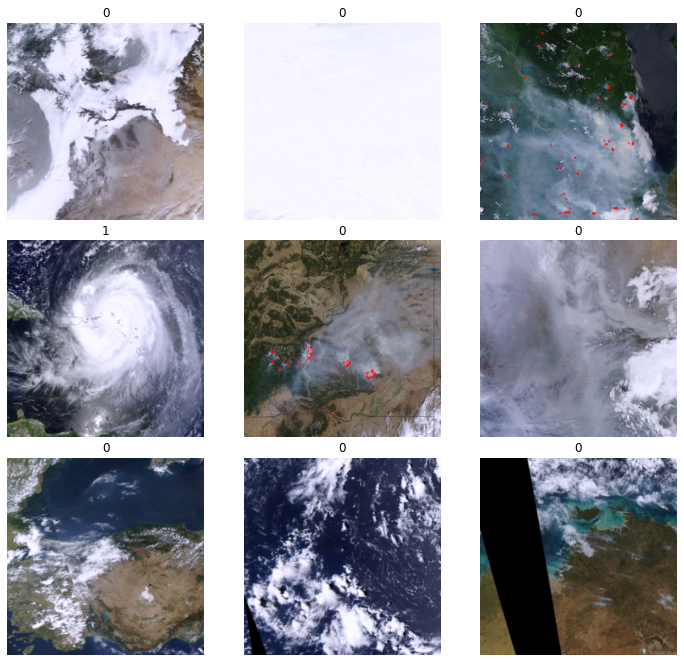

In [ ]:
# get image and label from train data loader
testX_sanity, testY_sanity = next(iter(train_loader))

L = 3
W = 3

fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
# de-normalize imagenet normalization from loader
norm = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                            std=[1/0.229, 1/0.224, 1/0.255])

for i in np.arange(0, L*W):
    img_norm = norm(testX_sanity[i])
    axes[i].imshow(img_norm.permute(1, 2, 0))

    axes[i].set_title('{}'.format(testY_sanity[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0)
plt.show()
plt.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


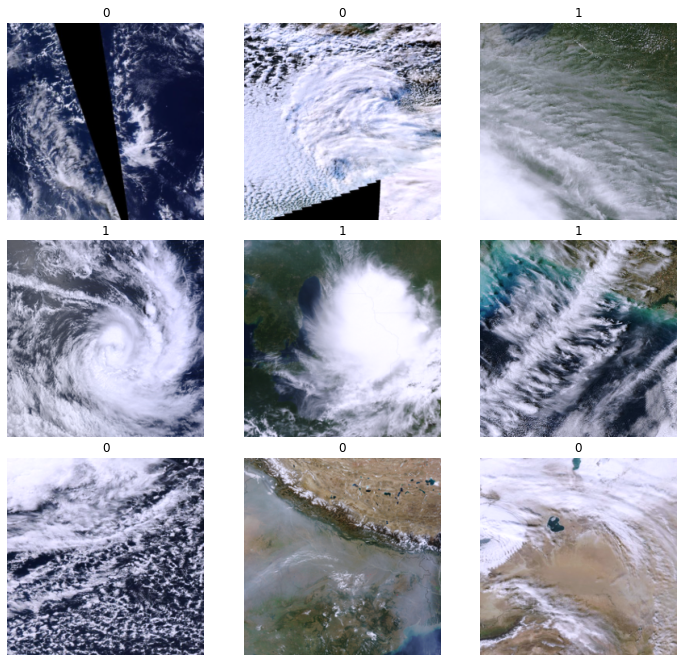

In [ ]:
# get image and label from validation data loader

testX_sanity, testY_sanity = next(iter(val_loader))

L = 3
W = 3

fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
# de-normalize imagenet normalization from loader
norm = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                            std=[1/0.229, 1/0.224, 1/0.255])

for i in np.arange(0, L*W):
    img_norm = norm(testX_sanity[i])
    axes[i].imshow(img_norm.permute(1, 2, 0))

    axes[i].set_title('{}'.format(testY_sanity[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0)
plt.show()
plt.close()

In [ ]:
# Assign data loader to dictionary
loaders = {'train': train_loader, 'valid': val_loader}

# Create model
Models

Transfer learning

In [ ]:
# Create model
# Transfer Learning

class Resnet50_pretrained:
    
    def __init__(self, num_classes):

        # self.device = device
        self.num_classes = num_classes
        self.model = models.resnet50(pretrained=True)
        self.fc_out = nn.Linear(2048, num_classes, bias=True)

        # freeze model params for features
        for param in self.model.parameters():
            param.requires_grad = False
            
        #reset last output layer (so not frozen)
        self.model.fc = self.fc_out   

In [ ]:
# Number of Epochs (cycles) our training will look at our data
n_epochs = 15

# if Cuda (GPU) device available use it. Else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Learning Rate ()
learn_rate=0.001

# The number of classes we're training on and going to predict
num_classes = 2

# Where to save our model 
save_path ='model'

# print the device we're using to compute
print("device: "+ str(device))

device: cuda


In [ ]:
# create instance of our resnet model
res_model = Resnet50_pretrained(num_classes)
# Assign just the model portion to model variable
model = res_model.model
# Assign CrossEntropyLoss as criterion (how the network is to learn)
criterion = nn.CrossEntropyLoss()
# optimization algorithm (ADAM is another popular one) 
optimizer = optim.SGD(model.fc.parameters(), lr=learn_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
# View the model architecture
# Remember when we looked as a simple CNN. 
# This is what a top performing one looks like
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:

# history dict for training log    
history = {'train_loss':[],
            'train_acc':[],
            'val_loss':[],
            'val_acc':[]
            }

# Assign device to compute model one
model = model.to(device)

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf 

with tqdm(range(n_epochs)) as t:

    # perform operation for the number of epochs we assigned
    for epoch in range(1, n_epochs+1):
        
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        num_correct = 0       
        num_examples = 0
    
        ######################  
        # train the model    #
        ######################  
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to device
            data = data.to(device)
            target = target.to(device)

            # reset gradient weights to zero
            optimizer.zero_grad()
            
            output = model(data)
            
            # calculate loss
            loss = criterion(output, target)
            
            # Compute Gradient
            loss.backward()
            
            # Adjust weights w/ Gradient
            optimizer.step()
            
            ## find the loss and update the model parameters accordingly
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],
                                        target).view(-1)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]

            # calculate training accuracy
            train_acc = num_correct / num_examples

            # display train loss while training
            t.set_postfix(loss='{:.3f}'.format(train_loss))
            

        ######################    
        # validate the model #
        ######################
        num_correct = 0       
        num_examples = 0
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            
            # move to device
            data = data.to(device)
            target = target.to(device)
                
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            # caluculate validation accuracy
            correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],
                                        target).view(-1)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
            valid_acc = num_correct / num_examples
            
            # Display val accuracy while training
            t.set_postfix(val_accuracy='{:.3f}'.format(valid_acc))

        # print training data per epoch
        print("\n---------------------------------\n")
        print(f'epoch: {epoch}/{n_epochs}')
        print(f'train_loss:__{train_loss:.6f}')
        print(f'train_acc:___{train_acc:.6f}')
        print(f'val_loss:____{valid_loss:.6f}')
        print(f'val_acc:_____{valid_acc:.6f}')

        ## save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path+'.pt')
            print(f'\nval_loss decreased: model saved at {save_path}.pt')
            valid_loss_min = valid_loss

        print("\n---------------------------------\n")

        # append training & validation history
        history['train_loss'].append(float(train_loss))
        history['train_acc'].append(train_acc)
        history['val_loss'].append(float(valid_loss))
        history['val_acc'].append(valid_acc)

        # Save training history to csv file
        # save_history_csv(history, save_path)
        
        # update epoch progress bar
        t.update()

  0%|          | 0/15 [02:42<?, ?it/s, val_accuracy=0.764]


---------------------------------

epoch: 1/15
train_loss:__0.542045
train_acc:___0.721140
val_loss:____0.471608
val_acc:_____0.764144


  7%|▋         | 1/15 [02:42<37:57, 162.69s/it, val_accuracy=0.764]


val_loss decreased: model saved at model.pt

---------------------------------



  7%|▋         | 1/15 [05:24<37:57, 162.69s/it, val_accuracy=0.835]


---------------------------------

epoch: 2/15
train_loss:__0.453687
train_acc:___0.788235
val_loss:____0.411926
val_acc:_____0.834680


 13%|█▎        | 2/15 [05:24<35:12, 162.51s/it, val_accuracy=0.835]


val_loss decreased: model saved at model.pt

---------------------------------



 13%|█▎        | 2/15 [08:03<35:12, 162.51s/it, val_accuracy=0.866]


---------------------------------

epoch: 3/15
train_loss:__0.406117
train_acc:___0.832169
val_loss:____0.376260
val_acc:_____0.865540


 20%|██        | 3/15 [08:03<32:15, 161.32s/it, val_accuracy=0.866]


val_loss decreased: model saved at model.pt

---------------------------------



 20%|██        | 3/15 [10:43<32:15, 161.32s/it, val_accuracy=0.880]


---------------------------------

epoch: 4/15
train_loss:__0.376013
train_acc:___0.852757
val_loss:____0.352585
val_acc:_____0.879500


 27%|██▋       | 4/15 [10:43<29:30, 160.97s/it, val_accuracy=0.880]


val_loss decreased: model saved at model.pt

---------------------------------



 27%|██▋       | 4/15 [13:23<29:30, 160.97s/it, val_accuracy=0.882]


---------------------------------

epoch: 5/15
train_loss:__0.355099
train_acc:___0.862132
val_loss:____0.335659
val_acc:_____0.882439


 33%|███▎      | 5/15 [13:23<26:47, 160.71s/it, val_accuracy=0.882]


val_loss decreased: model saved at model.pt

---------------------------------



 33%|███▎      | 5/15 [16:03<26:47, 160.71s/it, val_accuracy=0.887]


---------------------------------

epoch: 6/15
train_loss:__0.339580
train_acc:___0.869853
val_loss:____0.322885
val_acc:_____0.886848


 40%|████      | 6/15 [16:03<24:04, 160.49s/it, val_accuracy=0.887]


val_loss decreased: model saved at model.pt

---------------------------------



 40%|████      | 6/15 [18:43<24:04, 160.49s/it, val_accuracy=0.885]


---------------------------------

epoch: 7/15
train_loss:__0.327496
train_acc:___0.875000
val_loss:____0.312846
val_acc:_____0.885378


 47%|████▋     | 7/15 [18:43<21:23, 160.43s/it, val_accuracy=0.885]


val_loss decreased: model saved at model.pt

---------------------------------



 47%|████▋     | 7/15 [21:23<21:23, 160.43s/it, val_accuracy=0.890]


---------------------------------

epoch: 8/15
train_loss:__0.317744
train_acc:___0.878493
val_loss:____0.304704
val_acc:_____0.889787


 53%|█████▎    | 8/15 [21:23<18:41, 160.20s/it, val_accuracy=0.890]


val_loss decreased: model saved at model.pt

---------------------------------



 53%|█████▎    | 8/15 [24:02<18:41, 160.20s/it, val_accuracy=0.890]


---------------------------------

epoch: 9/15
train_loss:__0.309653
train_acc:___0.882353
val_loss:____0.297936
val_acc:_____0.889787


 60%|██████    | 9/15 [24:03<16:00, 160.02s/it, val_accuracy=0.890]


val_loss decreased: model saved at model.pt

---------------------------------



 60%|██████    | 9/15 [26:42<16:00, 160.02s/it, val_accuracy=0.891]


---------------------------------

epoch: 10/15
train_loss:__0.302792
train_acc:___0.884375
val_loss:____0.292198
val_acc:_____0.891256


 67%|██████▋   | 10/15 [26:42<13:19, 159.82s/it, val_accuracy=0.891]


val_loss decreased: model saved at model.pt

---------------------------------



 67%|██████▋   | 10/15 [29:21<13:19, 159.82s/it, val_accuracy=0.893]


---------------------------------

epoch: 11/15
train_loss:__0.296871
train_acc:___0.887500
val_loss:____0.287252
val_acc:_____0.893461


 73%|███████▎  | 11/15 [29:21<10:38, 159.71s/it, val_accuracy=0.893]


val_loss decreased: model saved at model.pt

---------------------------------



 73%|███████▎  | 11/15 [31:59<10:38, 159.71s/it, val_accuracy=0.896]


---------------------------------

epoch: 12/15
train_loss:__0.291689
train_acc:___0.890441
val_loss:____0.282933
val_acc:_____0.895665


 80%|████████  | 12/15 [32:00<07:57, 159.26s/it, val_accuracy=0.896]


val_loss decreased: model saved at model.pt

---------------------------------



 80%|████████  | 12/15 [34:36<07:57, 159.26s/it, val_accuracy=0.896]


---------------------------------

epoch: 13/15
train_loss:__0.287099
train_acc:___0.891912
val_loss:____0.279117
val_acc:_____0.895665


 87%|████████▋ | 13/15 [34:36<05:16, 158.45s/it, val_accuracy=0.896]


val_loss decreased: model saved at model.pt

---------------------------------



 87%|████████▋ | 13/15 [37:14<05:16, 158.45s/it, val_accuracy=0.895]


---------------------------------

epoch: 14/15
train_loss:__0.282993
train_acc:___0.893199
val_loss:____0.275714
val_acc:_____0.894930


 93%|█████████▎| 14/15 [37:14<02:38, 158.32s/it, val_accuracy=0.895]


val_loss decreased: model saved at model.pt

---------------------------------



 93%|█████████▎| 14/15 [39:52<02:38, 158.32s/it, val_accuracy=0.897]


---------------------------------

epoch: 15/15
train_loss:__0.279288
train_acc:___0.894301
val_loss:____0.272654
val_acc:_____0.897134


100%|██████████| 15/15 [39:52<00:00, 159.50s/it, val_accuracy=0.897]


val_loss decreased: model saved at model.pt

---------------------------------



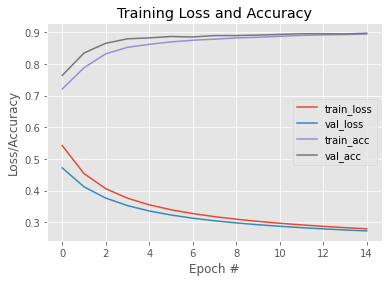

In [ ]:
# Plot trainig history 

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs),
            history["train_loss"],
            label="train_loss")
plt.plot(np.arange(0, n_epochs),
            history["val_loss"],
            label="val_loss")
plt.plot(np.arange(0, n_epochs),
            history["train_acc"],
            label="train_acc")
plt.plot(np.arange(0, n_epochs),
            history["val_acc"],
            label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
plt.close()

## Prediction

In [ ]:
# Our prediction
def predict(model, image, device, path=False):

    if path == True:
        image = Image.open(image)
    
    # Transform set to 244px recommended from pytorch doc 
    # for this pre trained network & change to tensor
    transform = transforms.Compose([transforms.Resize(size=(244, 244)),
                                    transforms.ToTensor()])
                                    
    img = transform(image)[:3,:,:].unsqueeze(0)
    
    # Change to device
    img = img.to(device)
    model = model.to(device)
    
    preds = model(img)
    prediction = torch.max(preds,1)[1].item()
    
    print(prediction)
    
      
    # return only highest prediction index
    return prediction

In [ ]:
# prep for downloading NASA data
!mkdir test_images

mkdir: cannot create directory ‘test_images’: File exists


In [ ]:
# downloading dust images to test 
!aws s3 cp s3://impact-datashare/hld-labeled ./test_images --recursive --no-sign-request

download: s3://impact-datashare/hld-labeled/high-latitude-dust_2003-01-19_admin_77_bitmap.png to test_images/high-latitude-dust_2003-01-19_admin_77_bitmap.png
download: s3://impact-datashare/hld-labeled/high-latitude-dust_2003-10-30_admin_113_bitmap.png to test_images/high-latitude-dust_2003-10-30_admin_113_bitmap.png
download: s3://impact-datashare/hld-labeled/high-latitude-dust_2003-03-13_admin_32_bitmap.png to test_images/high-latitude-dust_2003-03-13_admin_32_bitmap.png
download: s3://impact-datashare/hld-labeled/high-latitude-dust_2003-11-02_admin_31_bitmap.png to test_images/high-latitude-dust_2003-11-02_admin_31_bitmap.png
download: s3://impact-datashare/hld-labeled/high-latitude-dust_2004-10-05_admin_30_bitmap.png to test_images/high-latitude-dust_2004-10-05_admin_30_bitmap.png
download: s3://impact-datashare/hld-labeled/high-latitude-dust_2005-11-05_admin_33_bitmap.png to test_images/high-latitude-dust_2005-11-05_admin_33_bitmap.png
download: s3://impact-datashare/hld-labeled/

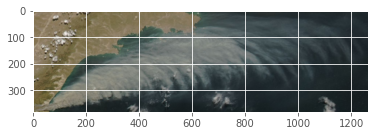

In [ ]:
image_path = '/content/test_images/high-latitude-dust_2003-01-19_admin_77.tiff'

pred_image = Image.open(image_path)
plt.imshow(pred_image)
plt.show()

In [ ]:
predict(model,image_path,device, True)

1


1

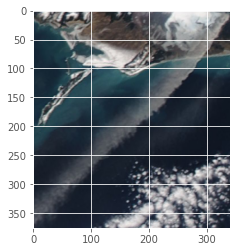

In [ ]:
image_path = '/content/test_images/high-latitude-dust_2003-03-13_admin_32.tiff'

pred_image = Image.open(image_path)
plt.imshow(pred_image)
plt.show()

In [ ]:
predict(model,image_path,device, True)

0


0